# Question 1

In [32]:
import pandas as pd
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep = "|")
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [33]:
users.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [34]:
users.rename(columns={"sex":"gender"}, inplace=True)

In [35]:
genders = users.groupby("occupation")["gender"].value_counts(normalize=True)*100
genders.head()

occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
Name: gender, dtype: float64

In [36]:
gendersn = pd.DataFrame(genders)
gendersn.rename(columns={"gender":"percent"}, inplace=True)
gendersn.head()

percent
occupation    gender            
administrator M        54.430380
              F        45.569620
artist        M        53.571429
              F        46.428571
doctor        M       100.000000

In [37]:
new_gen = pd.DataFrame(gendersn.reset_index(level=["occupation", "gender"]))
new_gen.head()

,occupation,gender,percent
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000


In [38]:
males = new_gen[new_gen["gender"] == "M"].sort_values(by="percent",ascending=False)
males

,occupation,gender,percent
4,doctor,M,100.000000
7,engineer,M,97.014925
37,technician,M,96.296296
29,retired,M,92.857143
27,programmer,M,90.909091
11,executive,M,90.625000
33,scientist,M,90.322581
9,entertainment,M,88.888889
17,lawyer,M,83.333333
31,salesman,M,75.000000


In [39]:
users.groupby("occupation").age.agg([min, max])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [40]:
users.groupby(["occupation", "gender"]).age.mean()
new_gen

,occupation,gender,percent
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000
5,educator,M,72.631579
6,educator,F,27.368421
7,engineer,M,97.014925
8,engineer,F,2.985075
9,entertainment,M,88.888889


# Question 5

In [41]:
import pandas as pd
import numpy as np
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep= '\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [42]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [16]:
chipo.shape

(4622, 5)

In [17]:
chipo.shape[1]

5

In [18]:
chipo.head(0)

,order_id,quantity,item_name,choice_description,item_price


In [19]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [20]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [21]:
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [22]:
chipo.groupby(by="choice_description").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [23]:
chipo.item_name.count()

4622

In [24]:
chipo.item_price.dtype

dtype('O')

In [25]:
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)

In [26]:
chipo.item_price.dtype

dtype('float64')

In [27]:
revenue =  (chipo.item_price * chipo.quantity).sum()
print('Revenue is : $ '+ str(revenue))

Revenue is : $ 39237.02


In [28]:
chipo.order_id.value_counts().count()

1834

In [29]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [30]:
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

In [31]:
chipo.item_name.value_counts().count()

50

# Question 6

In [1]:
import pandas as pd
import matplotlib.pyplot as pltlib

df=pd.read_csv('us-marriages-divorces-1867-2014.csv')
df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


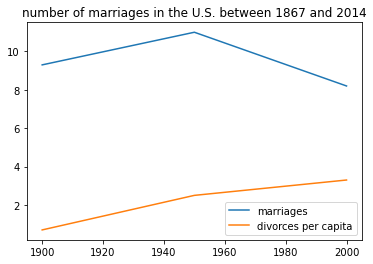

In [12]:
plt.title('number of marriages in the U.S. between 1867 and 2014')
plt.plot(years, marriages_per_capita, label = "marriages")
plt.plot(years, divorces_per_capita, label = "divorces per capita")
plt.legend()
plt.show()

# Question 7

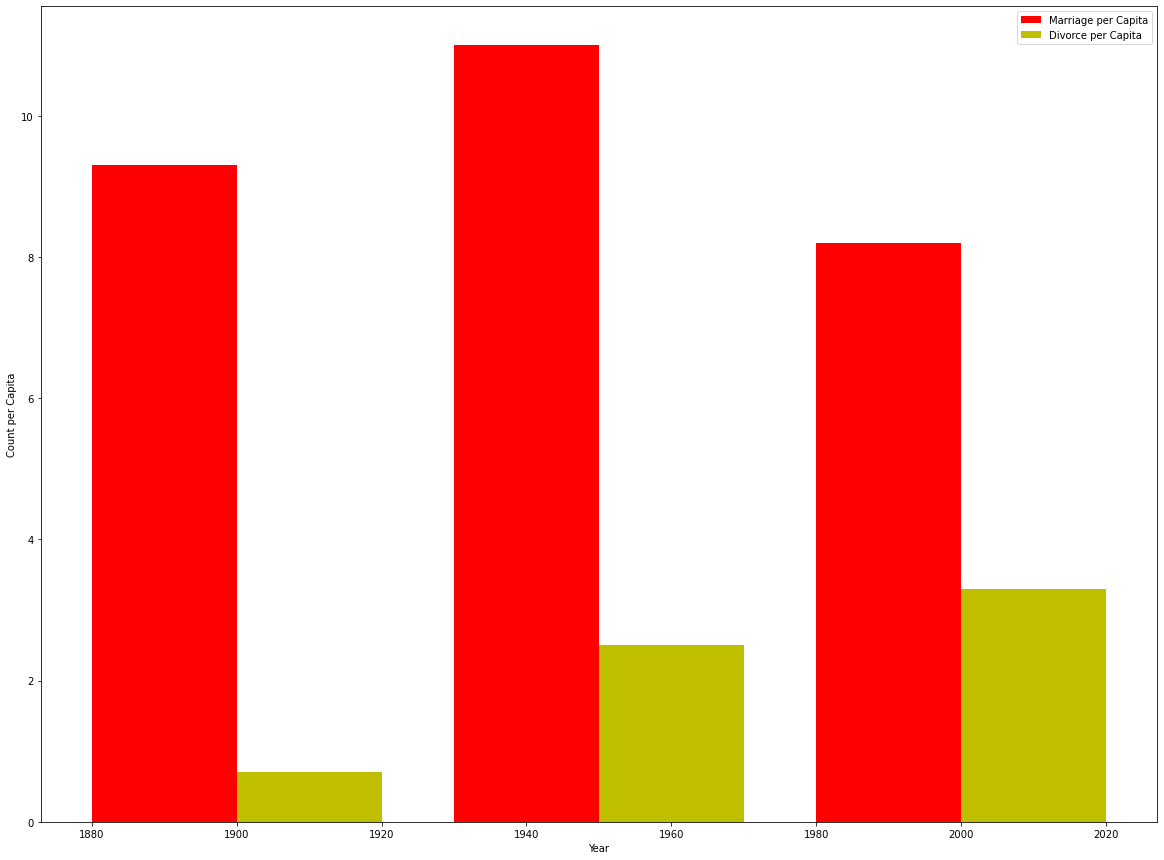

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


us_marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
us_marriage_divorce_data = us_marriage_divorce_data[
    us_marriage_divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = us_marriage_divorce_data['Year'].values
marriages_per_capita = us_marriage_divorce_data['Marriages_per_1000'].values
divorces_per_capita = us_marriage_divorce_data['Divorces_per_1000'].values
width = 20

plt.figure(figsize=(20,15))
plt.bar(x=(years - width/2), height=marriages_per_capita, color='r', width=width, label='Marriage per Capita')
plt.bar(x=(years + width/2), height=divorces_per_capita, color='y', width=width, label='Divorce per Capita')
plt.xlabel('Year')
plt.ylabel('Count per Capita')
plt.legend(loc='upper right')
plt.show()

# Question 8

In [8]:
import pandas as pd

hollywood_actor_kills = pd.read_csv('actor_kill_counts.csv')
hollywood_actor_kills

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


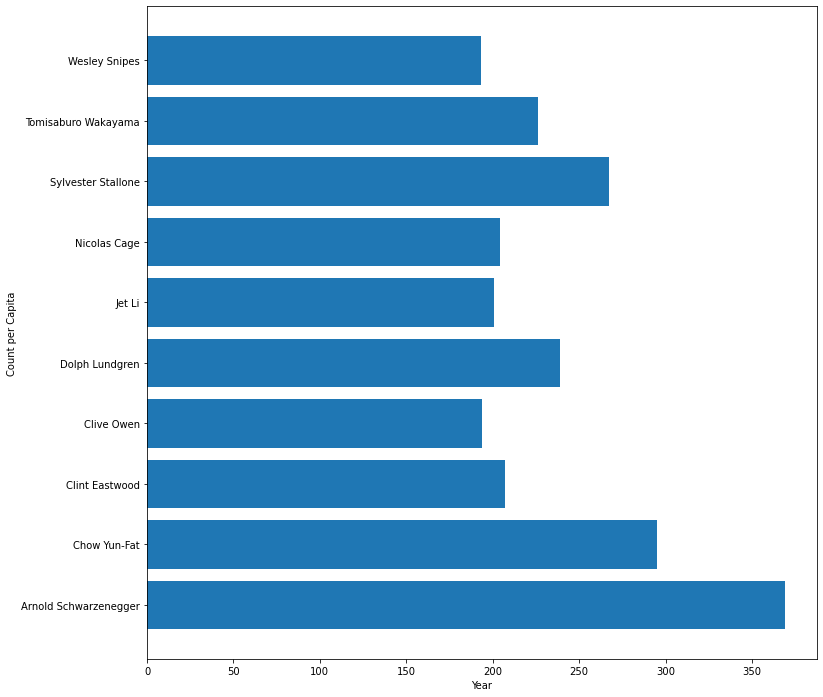

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

hollywood_actor_kills = pd.read_csv('actor_kill_counts.csv')
actor_names = hollywood_actor_kills['Actor'].values
kill_counts = hollywood_actor_kills['Count'].values

plt.figure(figsize=(12, 12))
plt.barh(actor_names, kill_counts)
plt.xlabel('Year')
plt.ylabel('Count per Capita')
plt.show()

# Question 9

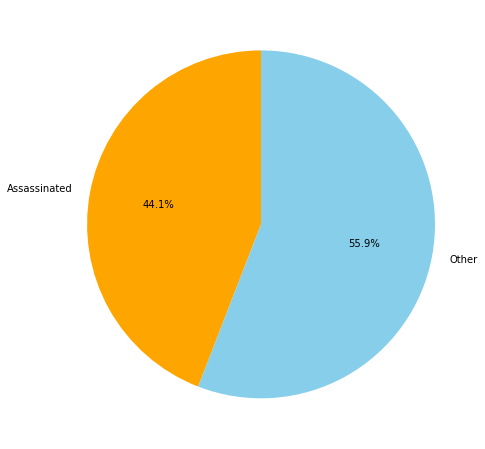

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

roman_emperors = pd.read_csv('roman-emperor-reigns.csv')
assassinated_emperors = roman_emperors[roman_emperors['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]

number_assassinated = len(assassinated_emperors)
other_deaths = len(roman_emperors) - number_assassinated

plt.figure(figsize=(8, 8))
plt.pie([number_assassinated, other_deaths], colors=['orange', 'skyblue'], startangle=90, autopct='%2.1f%%', labels=['Assassinated', 'Other'])
plt.show()

# Question 10

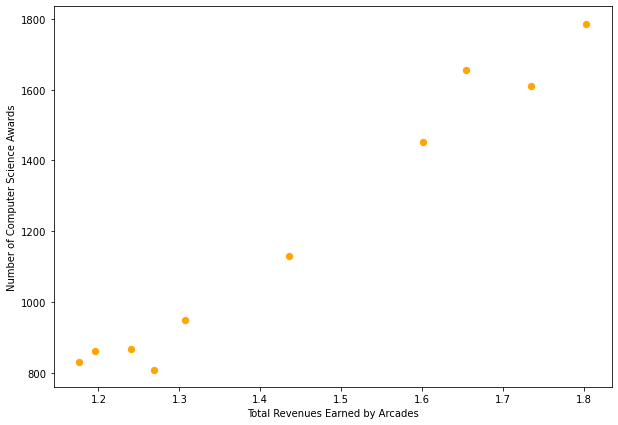

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

arcade_revenue_cs_doctorates = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade_revenue = arcade_revenue_cs_doctorates['Total Arcade Revenue (billions)'].values
cs_doctorates_awarded = arcade_revenue_cs_doctorates['Computer Science Doctorates Awarded (US)'].values

plt.figure(figsize=(10, 7))
plt.scatter(arcade_revenue, cs_doctorates_awarded, c='orange', s=40, marker='o')
plt.xlabel('Total Revenues Earned by Arcades')
plt.ylabel('Number of Computer Science Awards')
plt.show()